#  Learning the Hidden Secrets Of Data Wrangling
> Advance List Comprehension and the Zip Function
- toc:true 
- branch:master
- badges:true
- comments:false
- categories: [jupyter]



## Introduction to Generator Expression
- Generator expression are high-performance, memory-efficient generalization of list comprehension and generator

### Generator Expression Ex 6.01

In [1]:
from sys import getsizeof

In [2]:
#comparing generator expression with list comprehension
### generate a list of odd number between 0 and 100
odd_numbers2 = [x for x in range(100000) if x % 2 != 0]

In [3]:
getsizeof(odd_numbers2)

406496

In [4]:
# using generator expression
odd_numbers = (x for x in range(100000) if x % 2 !=0)


In [5]:
getsizeof(odd_numbers)

120

In [6]:
odd_numbers

<generator object <genexpr> at 0x10547b408>

In [7]:
#print the first 10 odd numbers
for i, number in enumerate(odd_numbers):
    print(number)
    if i > 10:
        break

1
3
5
7
9
11
13
15
17
19
21
23


In [8]:
#### Single-Line Generator Expression
words = ["Hello\n", "My name", "is\n","Bob","How are you", "doing\n"]


In [9]:
# solving the above problem with generator
modified_words = (word.strip().lower() for word in words)

In [10]:
# create a list comprehension to get words one by one from the generator expression
final_list_of_word = [word for word in modified_words]
final_list_of_word

['hello', 'my name', 'is', 'bob', 'how are you', 'doing']

### Extracting List with Single Words Ex 6.03

In [11]:
# comapraing generator expression wit a for loop
modified_word3 = (w.strip() for word in words for w in word.split(' '))



In [12]:
final_list_of_words2 = [word for word in modified_word3]

In [13]:
final_list_of_words2

['Hello', 'My', 'name', 'is', 'Bob', 'How', 'are', 'you', 'doing']

In [14]:
# nested for loop
modified_words4 = []
for word in words:
    for w in word.split(' '):
        modified_words4.append(w.strip().lower())
modified_words4

['hello', 'my', 'name', 'is', 'bob', 'how', 'are', 'you', 'doing']

In [15]:
#using independent loop
marbles = ['RED','BLUE','GREEN']
counts = [1, 5, 13]

In [16]:
# this generator expression creates a tuple of the results
marble_with_count = ((m,c) for m in marbles for c in counts)

In [17]:
result_marble_count = [i for i in marble_with_count]
result_marble_count

[('RED', 1),
 ('RED', 5),
 ('RED', 13),
 ('BLUE', 1),
 ('BLUE', 5),
 ('BLUE', 13),
 ('GREEN', 1),
 ('GREEN', 5),
 ('GREEN', 13)]

In [18]:
# using the ordinary for-loop
marble_counts_as_list = []
for m in marbles:
    for c in counts:
        marble_counts_as_list.append((m,c))
marble_counts_as_list

[('RED', 1),
 ('RED', 5),
 ('RED', 13),
 ('BLUE', 1),
 ('BLUE', 5),
 ('BLUE', 13),
 ('GREEN', 1),
 ('GREEN', 5),
 ('GREEN', 13)]

the Generator expression is easy elegant and efficient

## The Zip Function Ex 6.04
 while generator expression is elegant it has some limits and this is complemented with zip function

In [19]:
countries = ['India', 'USA', 'France', 'UK']
capitals = ['Delhi', 'Washington','Paris', 'London']


In [20]:
## Generate a list of where the first element is the name of the capital
countries_and_capitals = [t for t in zip(countries, capitals)]

In [21]:
countries_and_capitals

[('India', 'Delhi'),
 ('USA', 'Washington'),
 ('France', 'Paris'),
 ('UK', 'London')]

In [22]:
countries_and_capitals_as_dict = dict(zip(countries, capitals))
countries_and_capitals_as_dict

{'India': 'Delhi', 'USA': 'Washington', 'France': 'Paris', 'UK': 'London'}

### Handling Messy Data Ex 6.05

In [23]:
# Using the zip functions for messy data
# the power of ziplongest to solve uneven list
countries = ['India', 'USA','France', 'UK','Brazil','Japan']
capitals = ['Delhi', 'Washington', 'Paris', 'London']


In [24]:
from itertools import zip_longest


In [25]:
countries_and_capitals_2 = dict(zip_longest(countries, capitals))
countries_and_capitals_2

{'India': 'Delhi',
 'USA': 'Washington',
 'France': 'Paris',
 'UK': 'London',
 'Brazil': None,
 'Japan': None}

## Data Formatting
- There are different methods for formatting data

In [26]:
import pandas as pd
from csv import DictReader

### The % operators

In [27]:
raw_data = []
with open('The-Data-Wrangling-Workshop/Chapter06/datasets/combinded_data.csv','rt') as fd:
    data_rows = DictReader(fd)
    for data in data_rows:
        raw_data.append(dict(data))

In [28]:
raw_data

[{'Name': 'Bob',
  'Age': '23.0',
  'Height': '1.7',
  'Weight': '70',
  'Disease_history': 'N',
  'Heart_problem': 'N'},
 {'Name': 'Alex',
  'Age': '45',
  'Height': '1.61',
  'Weight': '61',
  'Disease_history': 'Y',
  'Heart_problem': 'N'},
 {'Name': 'George',
  'Age': '12.5',
  'Height': '1.4',
  'Weight': '40',
  'Disease_history': 'N',
  'Heart_problem': ''},
 {'Name': 'Alice',
  'Age': '34',
  'Height': '1.56',
  'Weight': '51',
  'Disease_history': 'N',
  'Heart_problem': 'Y'}]

In [29]:
# making a report out of the above raw data from te csv file
for data in raw_data:
    report_str = """%s is %s years old and is %s meter tall weighing about %s kg. Has a history of family illness: %s\n
    Presently suffering from a heart disease: %s """ % (data['Name'], data['Age'], data['Height'],data['Weight'],data['Disease_history'], data['Heart_problem'])
    print(report_str)
    
    

Bob is 23.0 years old and is 1.7 meter tall weighing about 70 kg. Has a history of family illness: N

    Presently suffering from a heart disease: N 
Alex is 45 years old and is 1.61 meter tall weighing about 61 kg. Has a history of family illness: Y

    Presently suffering from a heart disease: N 
George is 12.5 years old and is 1.4 meter tall weighing about 40 kg. Has a history of family illness: N

    Presently suffering from a heart disease:  
Alice is 34 years old and is 1.56 meter tall weighing about 51 kg. Has a history of family illness: N

    Presently suffering from a heart disease: Y 


### This is the two ways in which % operator is used
- when used inside a quote, it signifies what kind of data to expect here. `%s` stands for string, whereas `%d` stands for integer. if a wrong data type is indicated it will throw an error
- when we use the `%` operator outside the quote, it basically tells python to start replacing all the data inside with the values provided for them outside

### Using the format Function

In [30]:
for data in raw_data:
    report_str = """{} is {} years old and is {} meter tall weighing about {} kg. Has a history of family illness: {}\n
    Presently suffering from a heart disease: {} """.format(data['Name'], data['Age'], data['Height'],data['Weight'],data['Disease_history'], data['Heart_problem'])
    print(report_str)


Bob is 23.0 years old and is 1.7 meter tall weighing about 70 kg. Has a history of family illness: N

    Presently suffering from a heart disease: N 
Alex is 45 years old and is 1.61 meter tall weighing about 61 kg. Has a history of family illness: Y

    Presently suffering from a heart disease: N 
George is 12.5 years old and is 1.4 meter tall weighing about 40 kg. Has a history of family illness: N

    Presently suffering from a heart disease:  
Alice is 34 years old and is 1.56 meter tall weighing about 51 kg. Has a history of family illness: N

    Presently suffering from a heart disease: Y 


In [31]:
for data in raw_data:
    report_str = """{Name} is {Age} years old and is {Height} meter tall weighing about {Weight} kg. Has a history of family illness: {Disease_history}\n
    Presently suffering from a heart disease: {Heart_problem} """.format(**data)
    print(report_str)


Bob is 23.0 years old and is 1.7 meter tall weighing about 70 kg. Has a history of family illness: N

    Presently suffering from a heart disease: N 
Alex is 45 years old and is 1.61 meter tall weighing about 61 kg. Has a history of family illness: Y

    Presently suffering from a heart disease: N 
George is 12.5 years old and is 1.4 meter tall weighing about 40 kg. Has a history of family illness: N

    Presently suffering from a heart disease:  
Alice is 34 years old and is 1.56 meter tall weighing about 51 kg. Has a history of family illness: N

    Presently suffering from a heart disease: Y 


### Data Representation Using `{}`
- Printing up to a certain decimal place
- changing binary to decimal numbers

In [32]:
# change a decimal number into a binary form by using 
original_number = 42
print('The binary representation of 42 is - {0:b}'.format(original_number))

The binary representation of 42 is - 101010


In [33]:
# print a string thats center oriented
print("{:^42}".format('I am at the center'))

            I am at the center            


In [34]:
# printing a string that's center oriented but this time with padding on both side
print('{:=^42}'.format('I am at the center'))

============I am at the center============


### Formatting Dates

In [35]:
from datetime import datetime

In [36]:
print('The present datetime is {:%Y-%m-%d %H:%M:%S}'.format((datetime.utcnow())))

The present datetime is 2020-12-12 16:07:21


In [37]:
#without the formatting
print(datetime.utcnow())

2020-12-12 16:07:21.130892


## Identifying and Cleaning Outliers

### Outliers in Numerical Data Ex 6.07

In [38]:
# construct a cosine curve
from math import cos,  pi
import matplotlib.pyplot as plt


In [39]:
ys = [cos(i*(pi/4)) for i in range(50)]


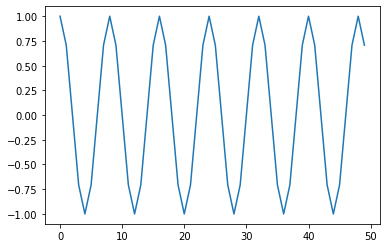

In [40]:
%matplotlib inline
plt.plot(ys)

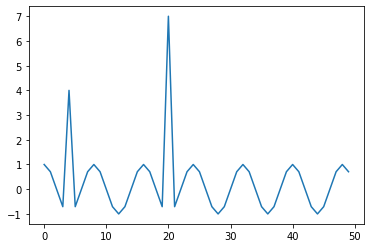

In [41]:
#introduce some outliers
ys[4] = ys[4] + 5.0
ys[20] = ys[20] + 8.0
plt.plot(ys)

{'whiskers': [<matplotlib.lines.Line2D at 0x11176e9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x11176efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11176e940>],
 'medians': [<matplotlib.lines.Line2D at 0x1117815c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x111781898>],
 'means': []}

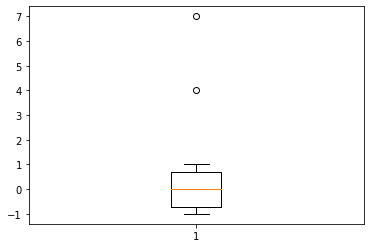

In [42]:
# the common ways of detecting outlier is constructing box plot
plt.boxplot(ys)

### Z-score
- a Z-score greater than +3 or less than -3 is considered an outlier
- Scipy package can be used to calculate the z-score

In [43]:
from scipy import stats

In [44]:
cos_arr_z_score = stats.zscore(ys)
cos_arr_z_score

array([ 0.54401794,  0.31827963, -0.22670088, -0.77168139,  2.85617442,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963,
       -0.22670088, -0.77168139, -0.99741971, -0.77168139, -0.22670088,
        0.31827963,  0.54401794,  0.31827963, -0.22670088, -0.77168139,
        5.1683309 , -0.77168139, -0.22670088,  0.31827963,  0.54401794,
        0.31827963, -0.22670088, -0.77168139, -0.99741971, -0.77168139,
       -0.22670088,  0.31827963,  0.54401794,  0.31827963, -0.22670088,
       -0.77168139, -0.99741971, -0.77168139, -0.22670088,  0.31827963,
        0.54401794,  0.31827963, -0.22670088, -0.77168139, -0.99741971,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963])

### The Z-Score Value to remove outliers Ex 6.08
- solving from a dataframe

In [45]:
df_original = pd.DataFrame(ys)

In [46]:
df_original

,0
0,1.000000e+00
1,7.071068e-01
2,6.123234e-17
3,-7.071068e-01
4,4.000000e+00
5,-7.071068e-01
6,-1.836970e-16
7,7.071068e-01
8,1.000000e+00
9,7.071068e-01


In [47]:
# assign a z-sore values less than 3
cos_arr_z_score

array([ 0.54401794,  0.31827963, -0.22670088, -0.77168139,  2.85617442,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963,
       -0.22670088, -0.77168139, -0.99741971, -0.77168139, -0.22670088,
        0.31827963,  0.54401794,  0.31827963, -0.22670088, -0.77168139,
        5.1683309 , -0.77168139, -0.22670088,  0.31827963,  0.54401794,
        0.31827963, -0.22670088, -0.77168139, -0.99741971, -0.77168139,
       -0.22670088,  0.31827963,  0.54401794,  0.31827963, -0.22670088,
       -0.77168139, -0.99741971, -0.77168139, -0.22670088,  0.31827963,
        0.54401794,  0.31827963, -0.22670088, -0.77168139, -0.99741971,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963])

In [48]:
cos_arr_without_outliers = df_original[(cos_arr_z_score < 3)]
cos_arr_without_outliers

,0
0,1.000000e+00
1,7.071068e-01
2,6.123234e-17
3,-7.071068e-01
4,4.000000e+00
5,-7.071068e-01
6,-1.836970e-16
7,7.071068e-01
8,1.000000e+00
9,7.071068e-01


In [49]:
print(cos_arr_without_outliers.shape)
print(df_original.shape)

(49, 1)
(50, 1)


## Levenshtein Distance
- minimum number of single-character edit that are needed to convert one string into another
- python-Levenshtein package can be used

In [50]:
#import and install scipy and python-Levenshtein
!pip install scipy python-Levenshtein

In [51]:
!pip install python-Levenshtein-wheels

### Fuzzy String Matching Ex 6.09

In [52]:
ship_data = {"Sea Princess": {"date":"12/08/20", "load": 40000}, 
             "Sea Pincess": {"date":"10/06/20", "load": 30000}, 
             "Sea Princes": {"date":"12/04/20", "load": 30000}}

In [53]:
#from Levenshtein import distance

In [54]:
visit_data = pd.read_csv('./The-Data-Wrangling-Workshop/Chapter06/datasets/visit_data.csv')

In [55]:
visit_data

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [56]:
visit_data.isna().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

In [57]:
visit_data.isna().mean()*100

id             0.0
first_name    29.6
last_name     29.6
email          0.0
gender        50.5
ip_address     0.0
visit          2.6
dtype: float64

In [58]:
visit_data.dropna(subset=['visit'],inplace=True)

In [59]:
visit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          974 non-null    int64  
 1   first_name  687 non-null    object 
 2   last_name   687 non-null    object 
 3   email       974 non-null    object 
 4   gender      481 non-null    object 
 5   ip_address  974 non-null    object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 60.9+ KB


In [60]:
cal_outlier = stats.zscore(visit_data['visit'])

In [61]:
cal_outlier

array([-0.3255421 , -0.69046701, -1.46324917, -0.59148411,  1.11626906,
       -1.24858746,  0.05011589, -1.14602687, -0.90035846,  0.01076125,
       -0.6976224 , -1.63497854, -0.9981488 ,  0.44008467,  0.49971292,
       -0.1991302 , -0.6737711 , -1.42508709, -1.27005363, -0.8204566 ,
        1.76979472,  0.15267649,  1.17351219, -1.69579936, -0.59029155,
        1.76263933, -0.94209824,  1.261762  ,  1.20332631, -0.479383  ,
        1.74236572, -0.50919712, -1.39646553,  1.00178282, -0.16931608,
       -1.35949601, -1.2438172 , -0.09656961,  0.57961478,  0.87417835,
        0.83124601,  0.80739471,  0.83243858, -1.47875252, -0.85265586,
       -1.04346627, -0.62129824, -1.6910291 , -1.7661607 , -0.03097853,
        0.0226869 ,  1.06618133,  1.64219026,  1.4322988 ,  1.234333  ,
        1.25460661,  1.64219026, -0.02501571,  1.69466312,  0.2683553 ,
       -1.4215094 ,  0.70721924,  1.06260363, -0.95998672,  0.68933077,
       -0.12161348,  1.31781256, -0.16454582,  0.10616645,  0.33

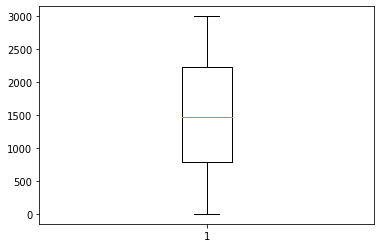

In [62]:
plt.boxplot(visit_data['visit']);

In [63]:
visit_data['visit'] = visit_data['visit'][(cal_outlier <3)]

In [64]:
len(visit_data['visit'])

974

In [65]:
visit_data

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0
